## 데이터프레임 시각화

In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# # MacOS 한글 설정
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시

### seaborn 패키지 이용한 그래프

In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.shape

(150, 5)

In [10]:
titanic.shape

(891, 15)

In [11]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.shape

(244, 7)

In [14]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [15]:
flights.shape

(144, 3)

In [16]:
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


### - 1차원 실수 분포 플롯

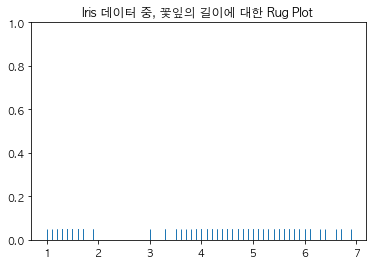

In [17]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

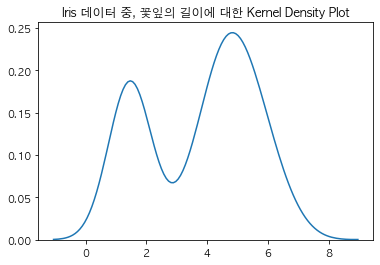

In [18]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

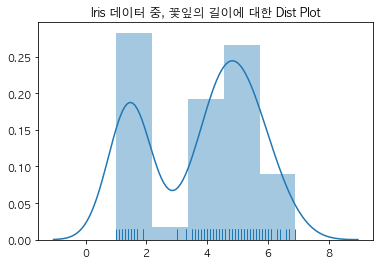

In [19]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

## - 카운트 플롯

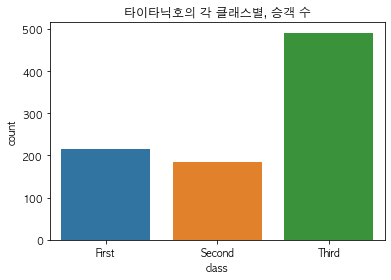

In [20]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

In [27]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

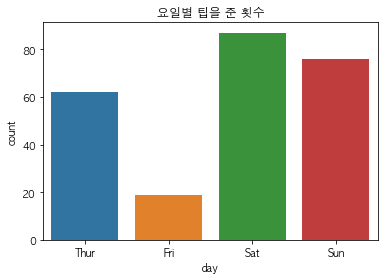

In [28]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

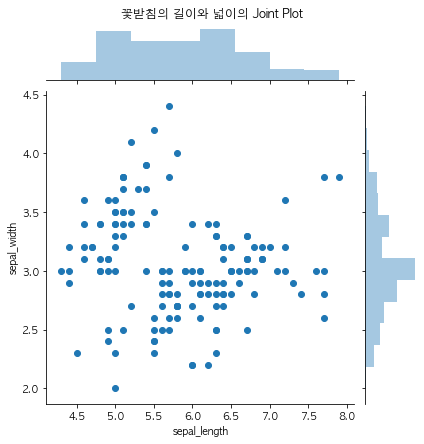

In [29]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

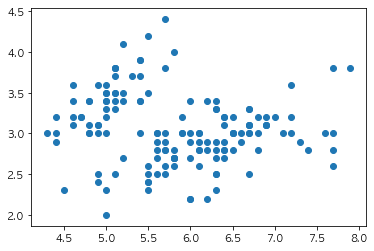

In [33]:
plt.scatter(iris['sepal_length'].values, iris['sepal_width'].values, marker='o')
plt.show()

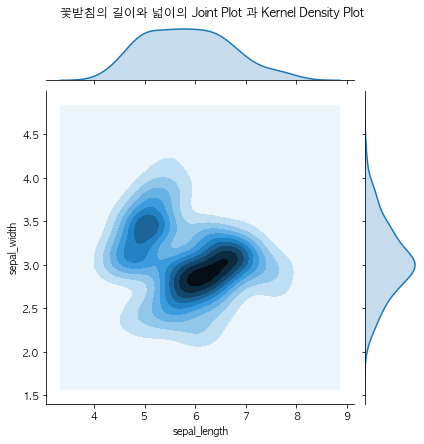

In [34]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

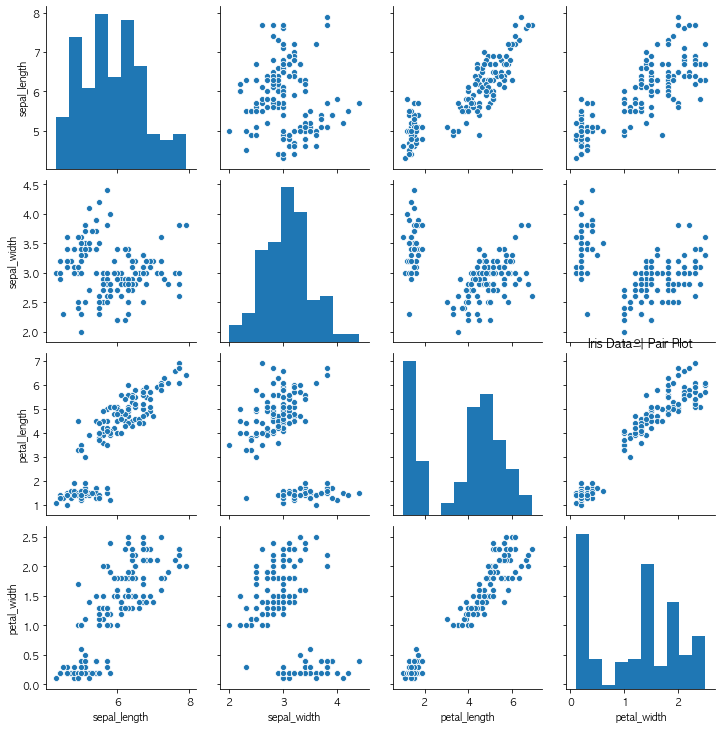

In [35]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

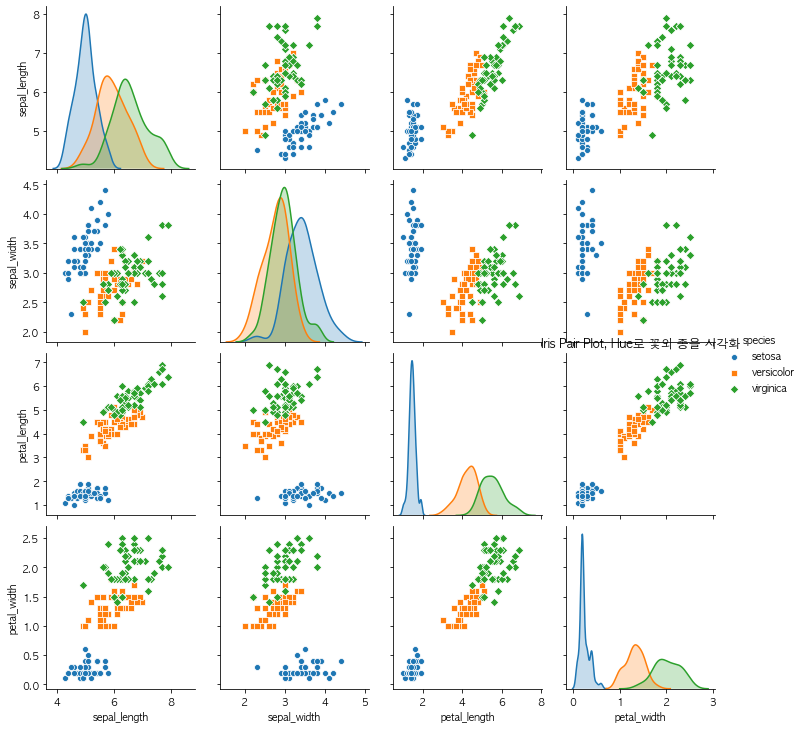

In [36]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### - 2차원 카테고리 데이터(Heatmap)

In [37]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


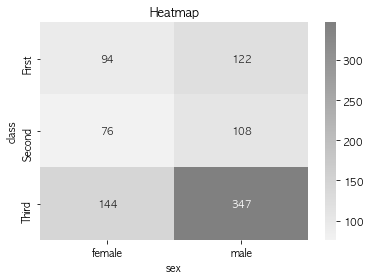

In [43]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

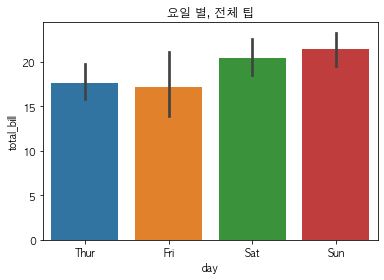

In [44]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

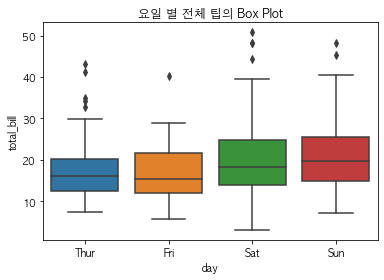

In [45]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

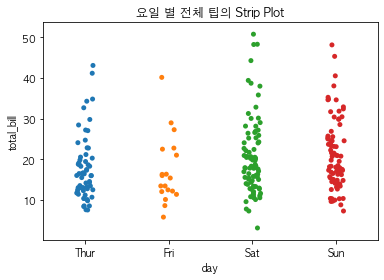

In [46]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

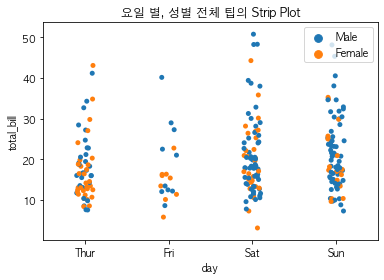

In [47]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

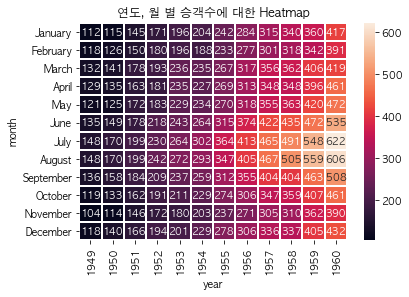

In [48]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

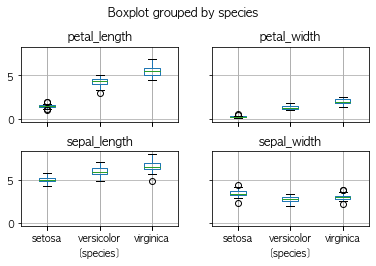

In [51]:
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1)
plt.show()